<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Energy_Efficiency_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Energy Efficiency Dataset
#Source: https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset
#Objective: Analyze energy efficiency metrics in buildings.

#Step 1: Setup and Data Preparation
#1. Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv("Energy_Efficiency.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
       X1     X2     X3     X4   X5  X6   X7  X8     Y1     Y2
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.5  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.5  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.5  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.5  3.5   5  0.4   5  16.64  16.03


In [2]:
#2. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.00000

In [3]:
#3. Handle Missing Values
#If there are missing values:

# Fill missing values with mean (for numerical columns)
for column in data.columns:
    if data[column].isnull().any():  # Check if column has NaN values
        data[column] = data[column].fillna(data[column].mean())

In [4]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#Label Encoding :
#For ordinal categorical variables (X6, X7, X8):

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to ordinal categorical columns
label_encoder = LabelEncoder()
data['X6'] = label_encoder.fit_transform(data['X6'])
data['X7'] = label_encoder.fit_transform(data['X7'])
data['X8'] = label_encoder.fit_transform(data['X8'])

# Display updated dataset
print(data.head())

     X1     X2     X3      X4   X5  X6  X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   0   0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   1   0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   2   0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   3   0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   0   0   0  20.84  28.28


In [5]:
#One-Hot Encoding :
#For nominal categorical variables:

# Perform one-hot encoding for categorical variables
categorical_columns = ['X6', 'X7', 'X8']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display updated dataset
print(data_encoded.head())

     X1     X2     X3      X4   X5     Y1     Y2   X6_1   X6_2   X6_3   X7_1  \
0  0.98  514.5  294.0  110.25  7.0  15.55  21.33  False  False  False  False   
1  0.98  514.5  294.0  110.25  7.0  15.55  21.33   True  False  False  False   
2  0.98  514.5  294.0  110.25  7.0  15.55  21.33  False   True  False  False   
3  0.98  514.5  294.0  110.25  7.0  15.55  21.33  False  False   True  False   
4  0.90  563.5  318.5  122.50  7.0  20.84  28.28  False  False  False  False   

    X7_2   X7_3   X8_1   X8_2   X8_3   X8_4   X8_5  
0  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  


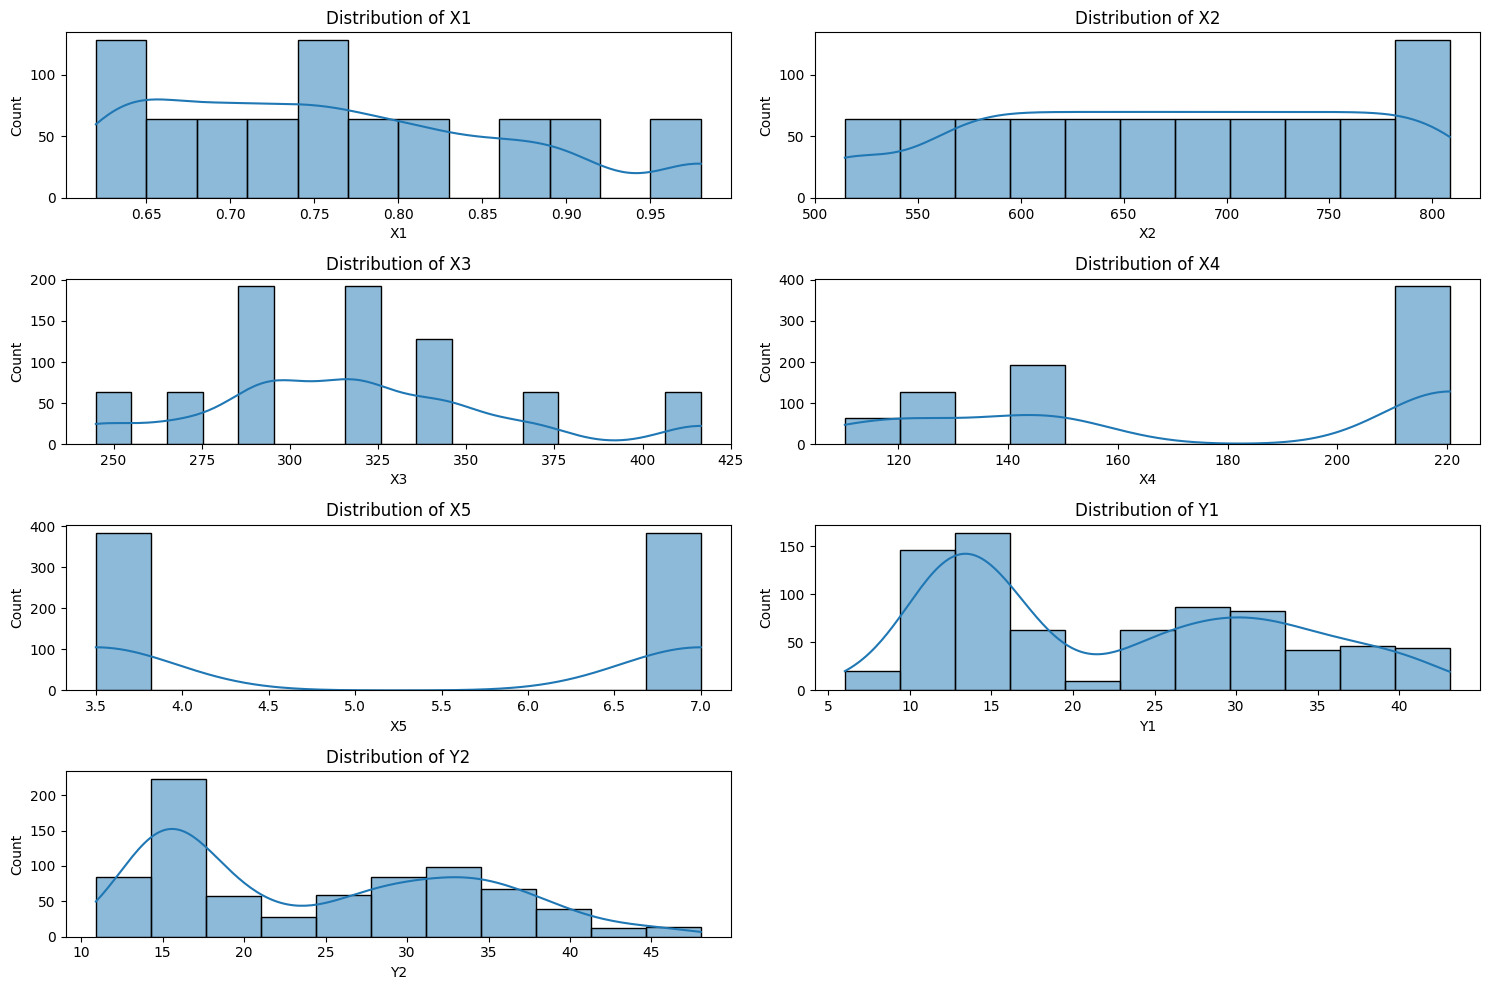

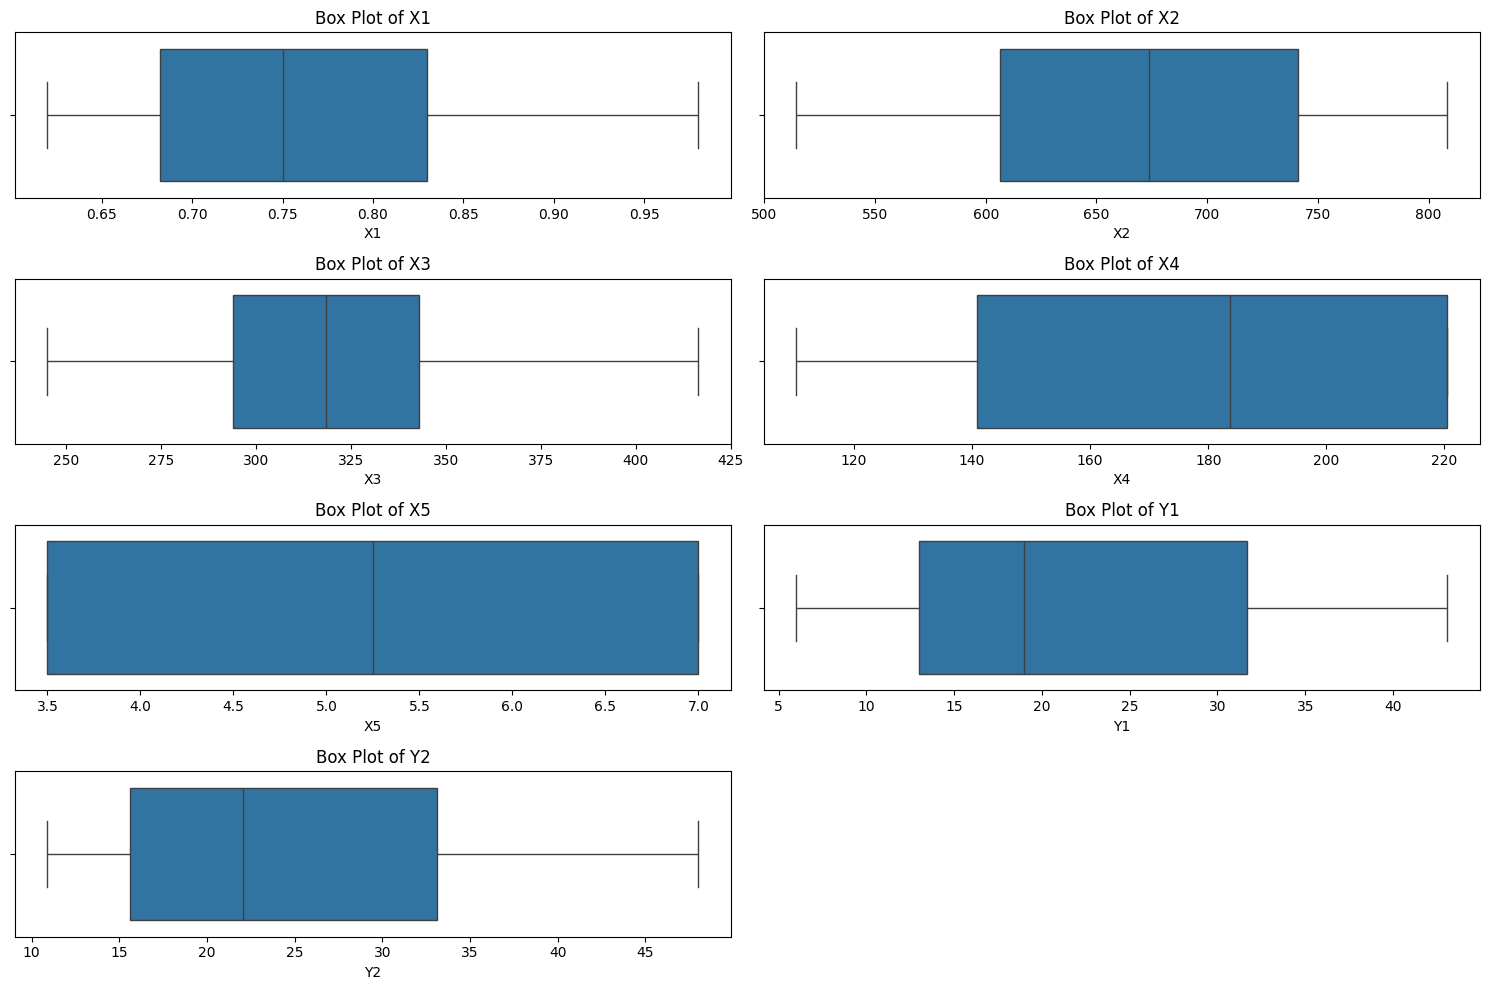

In [6]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'Y1', 'Y2']):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'Y1', 'Y2']):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

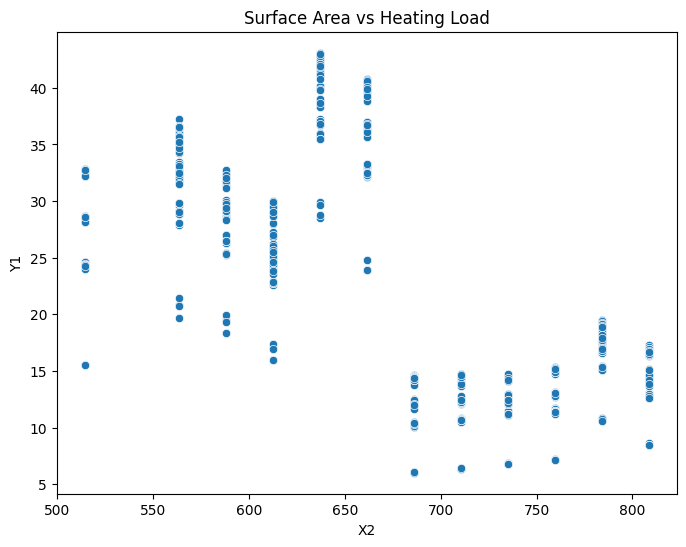

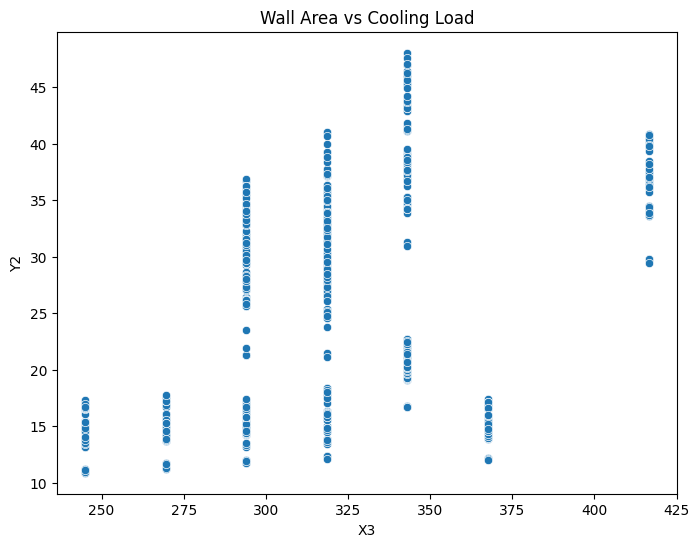

In [7]:
##2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :
# Scatter plot: Surface Area vs Heating Load
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X2', y='Y1', data=data)
plt.title('Surface Area vs Heating Load')
plt.show()

# Scatter plot: Wall Area vs Cooling Load
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X3', y='Y2', data=data)
plt.title('Wall Area vs Cooling Load')
plt.show()

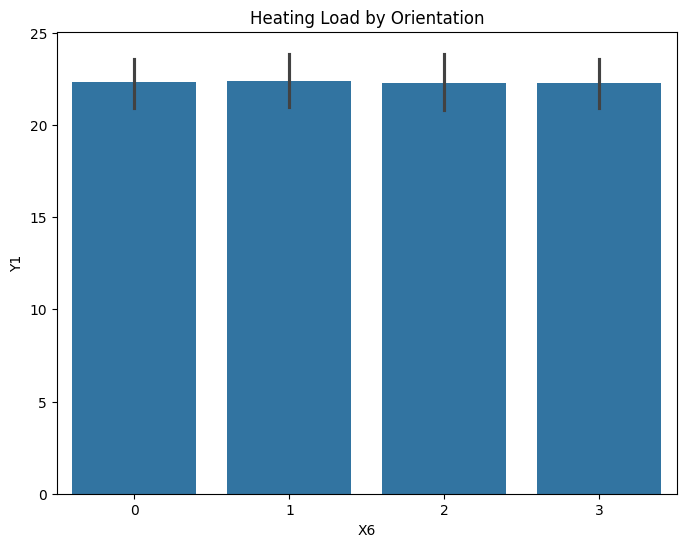

In [8]:
#Bar Plots :
# Bar plot: Orientation vs Heating Load
plt.figure(figsize=(8, 6))
sns.barplot(x='X6', y='Y1', data=data)
plt.title('Heating Load by Orientation')
plt.show()

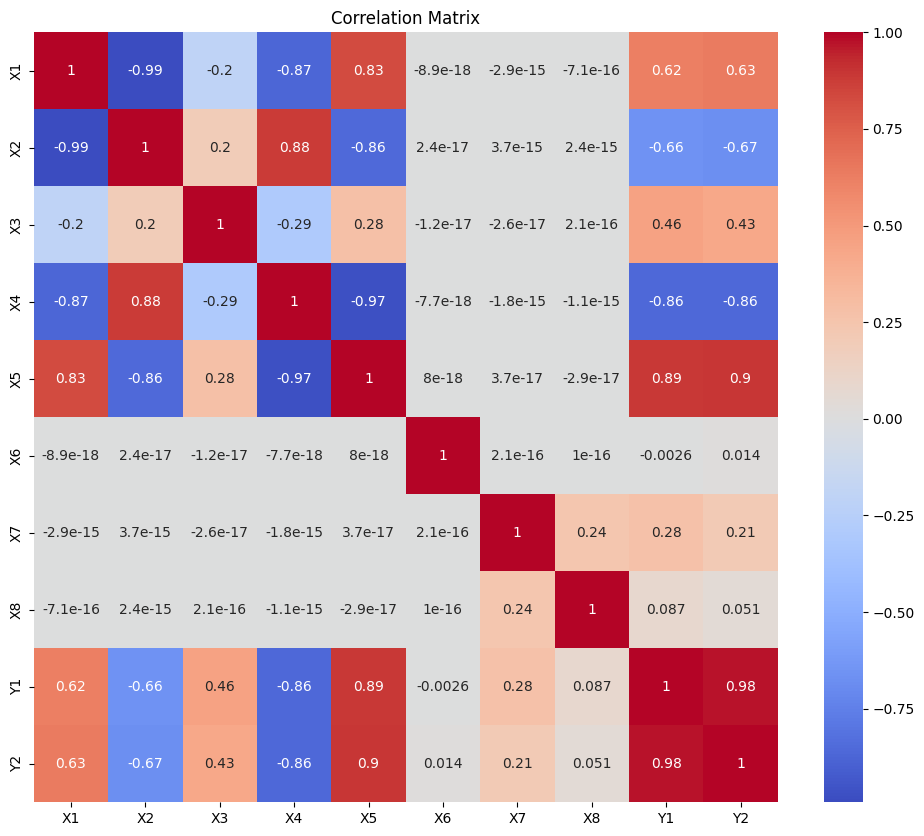

In [9]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

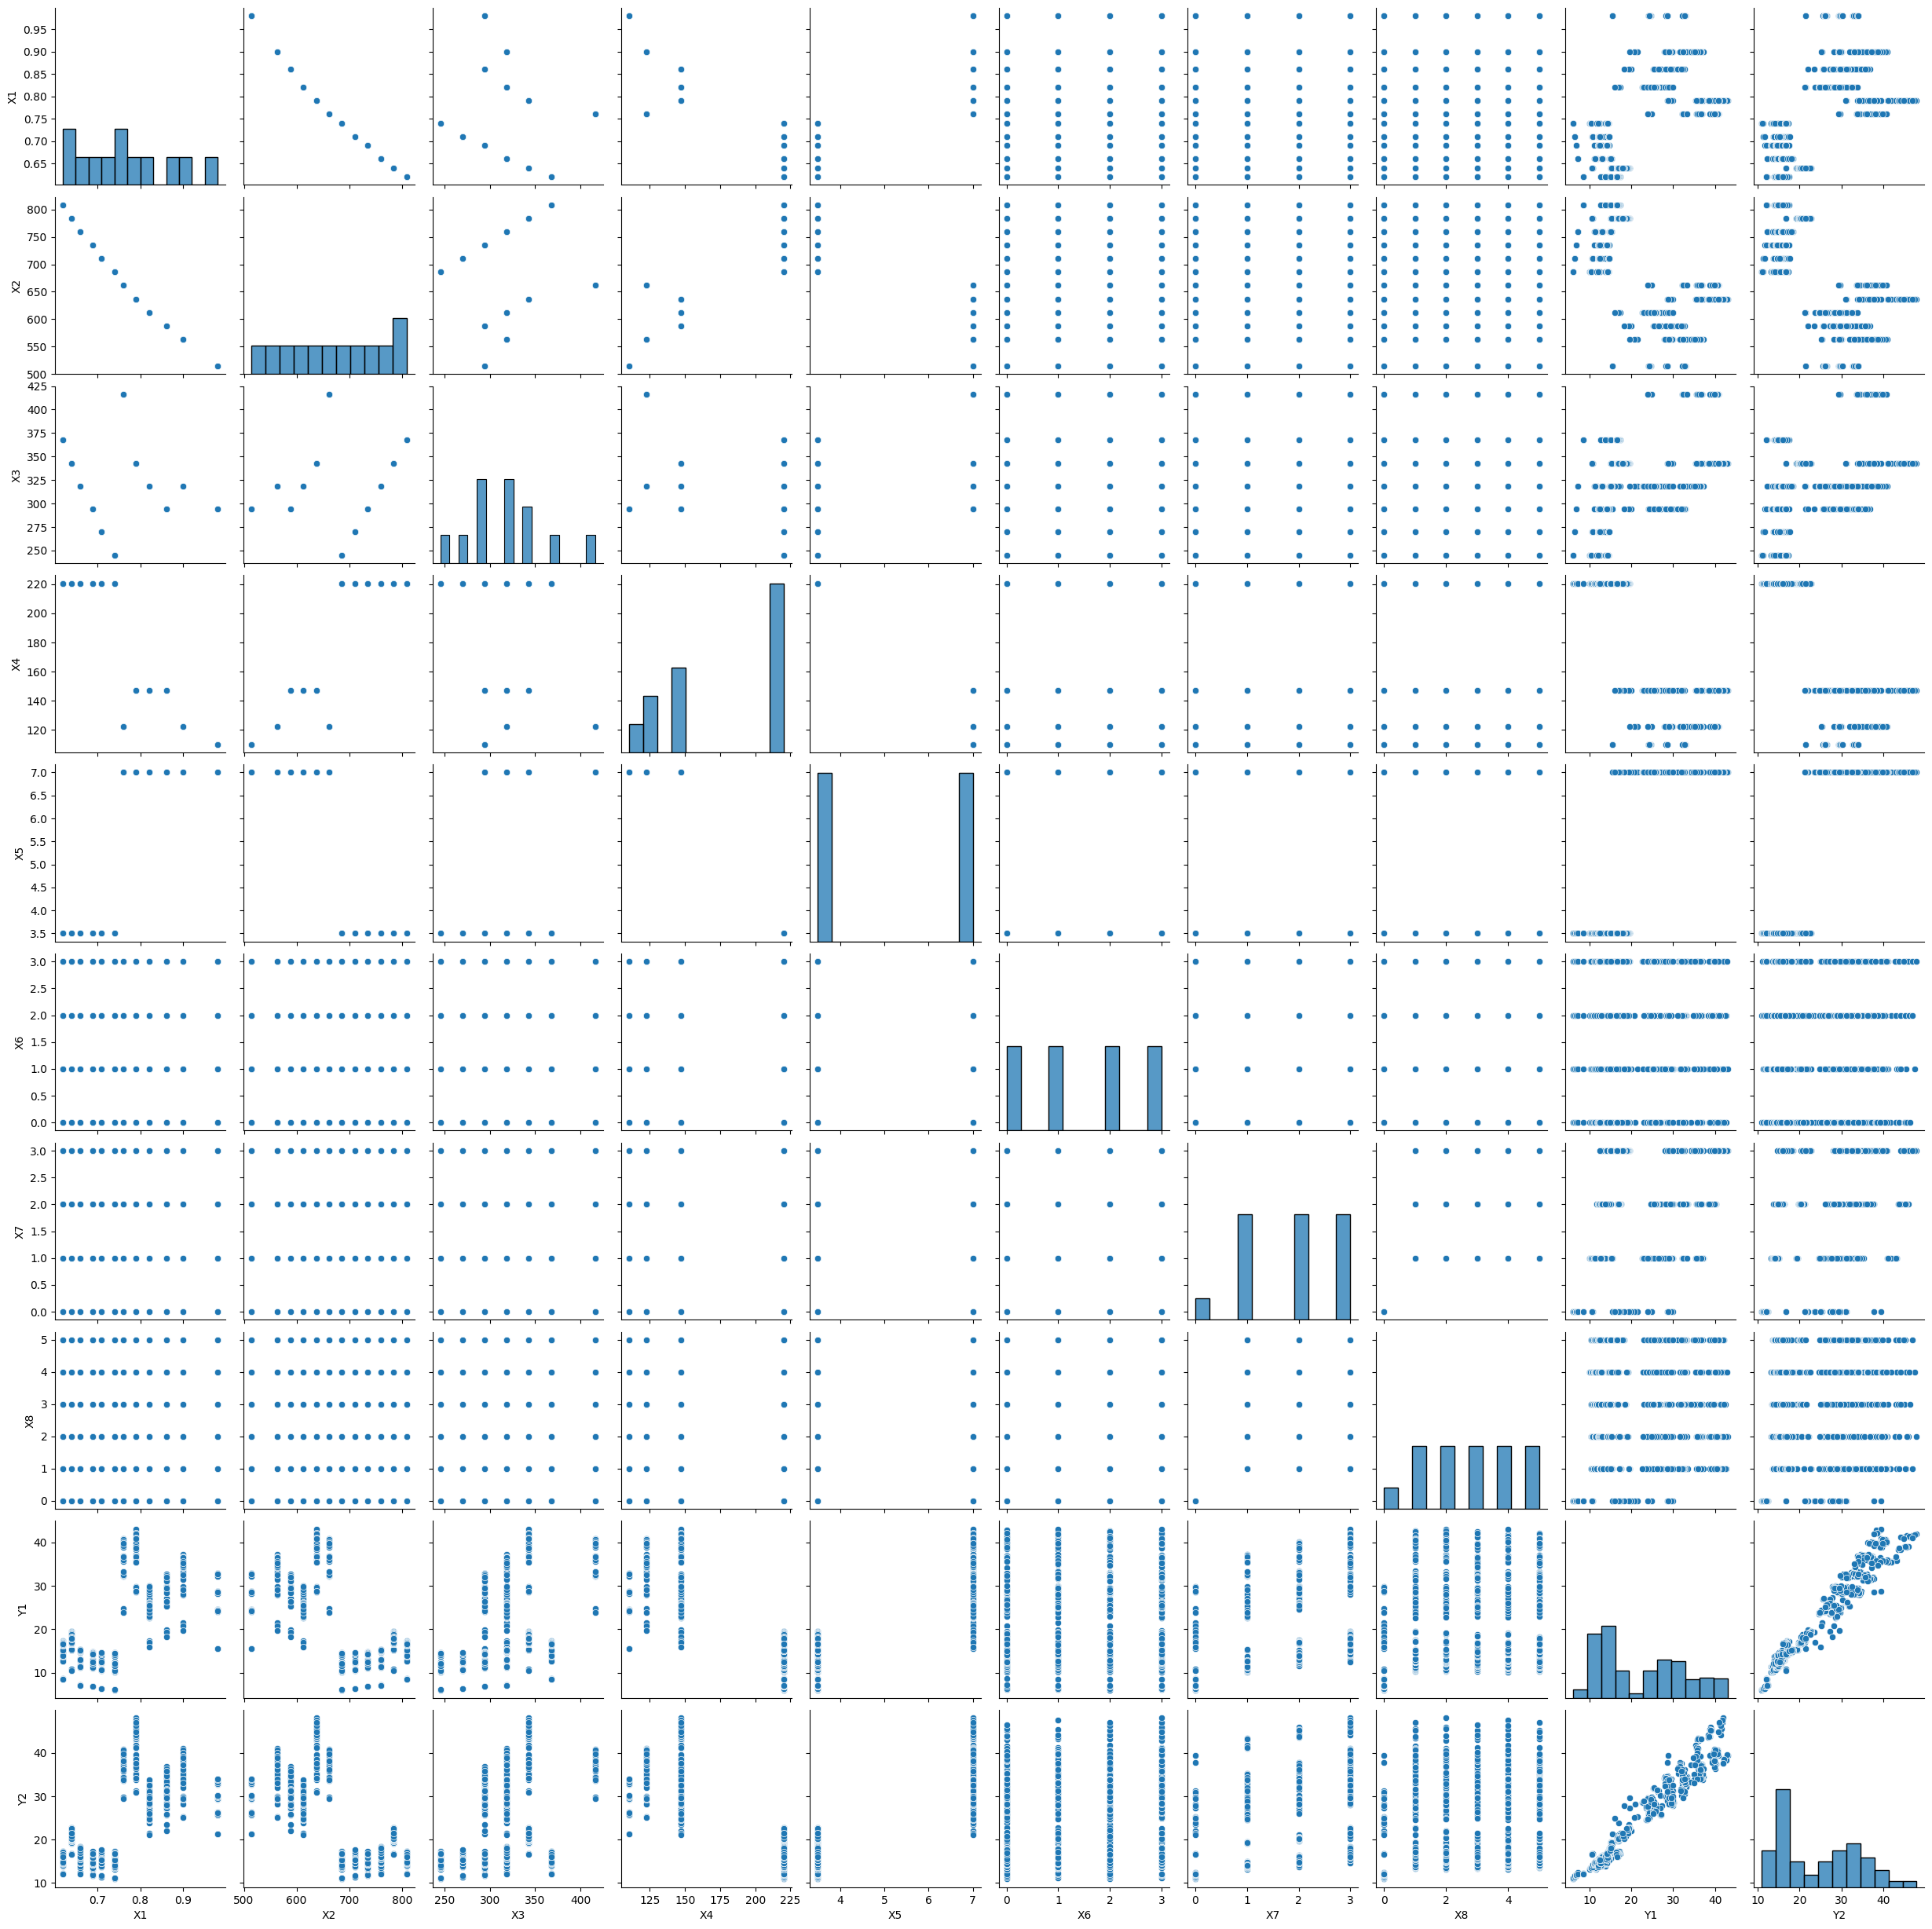

In [10]:
#Pair Plot :
# Pair plot for all variables
sns.pairplot(data)
plt.show()

In [11]:
# Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (768, 10)
Cleaned shape: (768, 10)


In [12]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Display scaled data
print(scaled_data.head())

         X1        X2        X3        X4   X5        X6      X7        X8  \
0  2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641 -2.0226 -1.814575   
1  2.041777 -1.785875 -0.561951 -1.470077  1.0 -0.447214 -2.0226 -1.814575   
2  2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214 -2.0226 -1.814575   
3  2.041777 -1.785875 -0.561951 -1.470077  1.0  1.341641 -2.0226 -1.814575   
4  1.284979 -1.229239  0.000000 -1.198678  1.0 -1.341641 -2.0226 -1.814575   

         Y1        Y2  
0 -0.670116 -0.342666  
1 -0.670116 -0.342666  
2 -0.670116 -0.342666  
3 -0.670116 -0.342666  
4 -0.145503  0.388366  


In [13]:
#Step 4: Train Predictive Models
#1. Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Define features (X) and targets (y1, y2)
X = data_cleaned.drop(['Y1', 'Y2'], axis=1)
y1 = data_cleaned['Y1']  # Heating Load
y2 = data_cleaned['Y2']  # Cooling Load

# Split into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [14]:
#2. Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model for Heating Load
model_y1 = LinearRegression()
model_y1.fit(X_train, y1_train)

# Make predictions
y1_pred = model_y1.predict(X_test)

# Evaluate the model
mse_y1 = mean_squared_error(y1_test, y1_pred)
r2_y1 = r2_score(y1_test, y1_pred)

print("\nHeating Load Model Performance:")
print(f"Mean Squared Error: {mse_y1:.2f}")
print(f"R-squared: {r2_y1:.2f}")

# Train a Linear Regression model for Cooling Load
model_y2 = LinearRegression()
model_y2.fit(X_train, y2_train)

# Make predictions
y2_pred = model_y2.predict(X_test)

# Evaluate the model
mse_y2 = mean_squared_error(y2_test, y2_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("\nCooling Load Model Performance:")
print(f"Mean Squared Error: {mse_y2:.2f}")
print(f"R-squared: {r2_y2:.2f}")


Heating Load Model Performance:
Mean Squared Error: 8.78
R-squared: 0.92

Cooling Load Model Performance:
Mean Squared Error: 9.75
R-squared: 0.89


X5     4.125461
X7     2.970418
X8     0.142145
X3     0.037511
X6    -0.039987
X4    -0.048850
X2    -0.060189
X1   -61.982161
dtype: float64


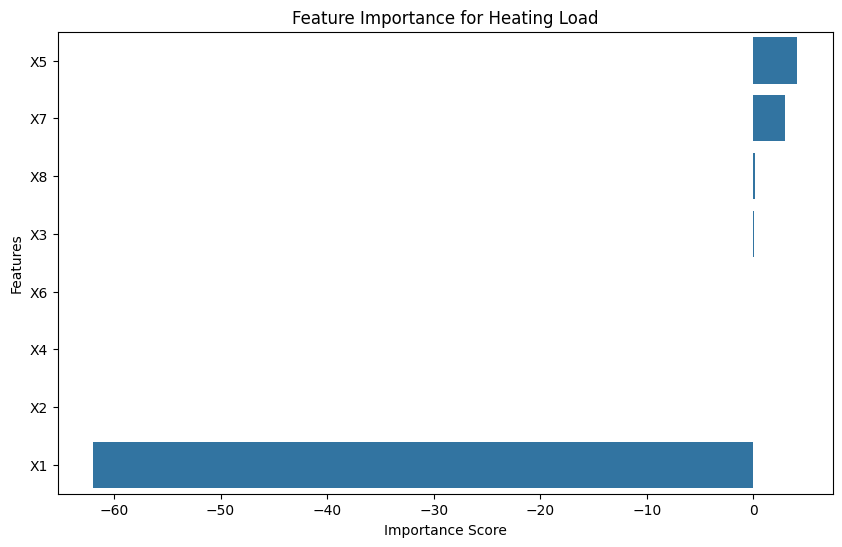

In [15]:
#3. Feature Importance
#Visualize feature importance to understand which factors influence heating and cooling loads the most.

# Extract feature importance for Heating Load
feature_importances_y1 = pd.Series(model_y1.coef_, index=X.columns)
feature_importances_y1 = feature_importances_y1.sort_values(ascending=False)

# Display feature importance
print(feature_importances_y1)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_y1, y=feature_importances_y1.index)
plt.title('Feature Importance for Heating Load')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [16]:
"""
Step 5: Summary of Insights
Key Findings
Strong Correlations :
Surface Area and Wall Area have strong positive correlations with both Heating Load and Cooling Load.
Glazing Area shows a moderate correlation with cooling load.
Categorical Variables :
Certain orientations (X6) and glazing area distributions (X8) significantly impact energy efficiency.
Outliers :
Some buildings have unusually high heating or cooling loads, which may need further investigation.
Recommendations
Focus on Surface Area, Wall Area, and Glazing Area as key predictors for energy efficiency.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

'\nStep 5: Summary of Insights\nKey Findings\nStrong Correlations :\nSurface Area and Wall Area have strong positive correlations with both Heating Load and Cooling Load.\nGlazing Area shows a moderate correlation with cooling load.\nCategorical Variables :\nCertain orientations (X6) and glazing area distributions (X8) significantly impact energy efficiency.\nOutliers :\nSome buildings have unusually high heating or cooling loads, which may need further investigation.\nRecommendations\nFocus on Surface Area, Wall Area, and Glazing Area as key predictors for energy efficiency.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact.\n'